# Name: James Castle
# Class: CS 7320 Sec 401
# Assignment 7: Neural Networks
# This program represents the creation of a simple neural network that
# predicts success (binary) based on a small set of input data.

In [1]:
import keras
from keras import layers
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Read in file and setup Dataframe

In [2]:
file_name = "7320.finaldata.csv"
# Read in file
df = pd.read_csv(file_name, delimiter=",")

print(df.head())
print(df.info())

         f1        f2    f3    f4 rank state    f5  success
0  0.018441  0.308841  0.18 -0.12   LO    TX -0.23        1
1 -0.718349  0.695683 -0.47  1.01   HI    NY  0.95        0
2  1.000000  0.000000  1.55  0.10   HI    NY  0.11        0
3 -0.801414  0.598111 -0.21  0.24   HI   CAL  0.10        0
4  1.900969  0.066116  2.12   NaN   HI   CAL -0.43        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f1       100 non-null    float64
 1   f2       100 non-null    float64
 2   f3       99 non-null     float64
 3   f4       99 non-null     float64
 4   rank     100 non-null    object 
 5   state    100 non-null    object 
 6   f5       100 non-null    float64
 7   success  100 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.4+ KB
None


Start Data Cleaning

In [3]:
df = df.dropna()  # Drop any rows with missing data
print(df.info())  # have 3 columns (rank, state not in fl/int format
df.replace({'rank': {'LO': 0, 'MED': 1, 'HI': 2}},
           inplace=True)
print(df.info())  # verify rank replaced with ints.
df.replace({'state': {'CAL': 0, 'NY': 1, 'TX': 2}},
           inplace=True)
print(df.info())  # verify state replaced with ints
print(df.head(10))

seed = 0
np.random.seed(seed)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 99
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f1       98 non-null     float64
 1   f2       98 non-null     float64
 2   f3       98 non-null     float64
 3   f4       98 non-null     float64
 4   rank     98 non-null     object 
 5   state    98 non-null     object 
 6   f5       98 non-null     float64
 7   success  98 non-null     int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 99
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f1       98 non-null     float64
 1   f2       98 non-null     float64
 2   f3       98 non-null     float64
 3   f4       98 non-null     float64
 4   rank     98 non-null     int64  
 5   state    98 non-null     object 
 6   f5       98 non-null     float64
 7   su

Setup X and Y for Training and Validation sets. (Originally set as NParr
However, decided to stay with Pandas DF for correlation mapping 
familiarity

In [4]:
# dataset = df.to_numpy()
# X = dataset[:, 0:7]
# Y = dataset[:, 7]

# attempt to keep things as a pandas DF
X = df.drop(['success'], axis=1)
print(X.head())
Y = df['success']
print(Y.head())

         f1        f2    f3    f4  rank  state    f5
0  0.018441  0.308841  0.18 -0.12     0      2 -0.23
1 -0.718349  0.695683 -0.47  1.01     2      1  0.95
2  1.000000  0.000000  1.55  0.10     2      1  0.11
3 -0.801414  0.598111 -0.21  0.24     2      0  0.10
5  0.715472 -0.458668  0.92 -0.65     2      2 -0.61
0    1
1    0
2    0
3    0
5    1
Name: success, dtype: int64


Setup Train Test Split for Model A

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.33,
                                                    random_state=seed)

Define Model A
* Sequential Model
* Decorrelation: None
* 7 input nodes (7 features)
* 16 neuron hidden layer with RELU activation function
* Single node output layer with sigmoid activation function
  (due to yes/no binary output)

Hyperparams:
* Epochs: 100
* Train-Test Split: 67/33
* Batch Size: 32

Compile model A using Binary Cross Entropy Loss function 
(due to binary output of success or not. Using adam optimizer and 
Accuracy as the metric of interest. 

In [8]:
# Create NN and define hyperparams
model = keras.Sequential()
model.add(layers.Dense(16, input_shape=(7,),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print('Part A model constructed')

model.compile(loss="binary_crossentropy", optimizer='adam', 
              metrics=['accuracy'])

Part A model constructed


Run and Time Model A

In [10]:
print('--------START PART A: Single Layer no std or decorr DF----')
tic = time.time()
# fit model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

--------START PART A: Single Layer no std or decorr DF----
Epoch 1/100
3/3 [==============================] - 0s 30ms/step - loss: 0.3835 - accuracy: 0.8615 - val_loss: 0.4537 - val_accuracy: 0.7576
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3817 - accuracy: 0.8615 - val_loss: 0.4526 - val_accuracy: 0.7576
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3801 - accuracy: 0.8615 - val_loss: 0.4516 - val_accuracy: 0.7576
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3787 - accuracy: 0.8615 - val_loss: 0.4508 - val_accuracy: 0.7879
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3773 - accuracy: 0.8615 - val_loss: 0.4503 - val_accuracy: 0.7879
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3757 - accuracy: 0.8615 - val_loss: 0.4498 - val_accuracy: 0.7879
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3743 - accuracy: 0.8615 - v

Standardize the Data for Part B1 using StandardScaler
Use fit_transform on the training data and transform on test data

In [11]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Run Model B1:
Uses the same setup as model A. 
    Note: Doing this allows for the model to
    start at the previously trained level from Test A.

The only change here is that we are
using the new standardized training and testing inputs 
from StandardScaler

Hyperparams:
* Epochs: 100
* Train-Test Split: 67/33
* Batch Size: 32

In [12]:
print('-------------START PART B1: STANDARDIZED TEST-------------')
tic = time.time()
# fit model
model.fit(X_train_std, y_train,
          validation_data=(X_test_std, y_test), epochs=100, 
          batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

-------------START PART B1: STANDARDIZED TEST-------------
Epoch 1/100
3/3 [==============================] - 0s 61ms/step - loss: 0.3328 - accuracy: 0.8615 - val_loss: 0.4864 - val_accuracy: 0.7273
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3288 - accuracy: 0.8769 - val_loss: 0.4785 - val_accuracy: 0.7576
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3221 - accuracy: 0.8923 - val_loss: 0.4704 - val_accuracy: 0.7576
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3161 - accuracy: 0.8923 - val_loss: 0.4639 - val_accuracy: 0.7879
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3108 - accuracy: 0.8923 - val_loss: 0.4585 - val_accuracy: 0.8485
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3052 - accuracy: 0.8923 - val_loss: 0.4542 - val_accuracy: 0.8788
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3008 - accuracy: 0.8923 - v

Check for highly correlated data. 

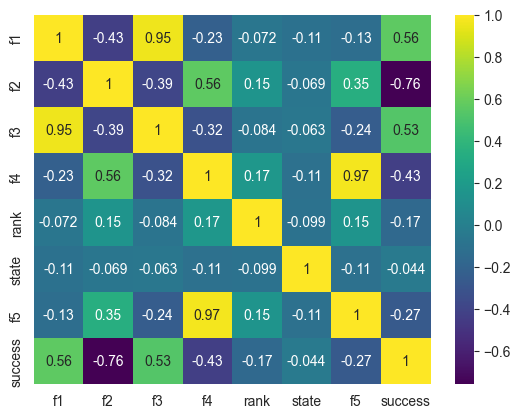

In [13]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap='viridis')
plt.show()

Remove highly correlated data
	Removing any correlations greater than +/- 90%
	I will drop the feature that is most highly correlated with the 
    target feature (i.e. success).
•	In this case, F1 is highly correlated with F3, but F1 is most 
    highly correlated with the target feature, so I will drop F1.
•	F4 is also highly correlated with F5, but F4 is more highly 
    correlated with the target feature, so I will drop F4.

In [14]:
corrDf = df
print(corrDf.head())
corrDf = corrDf.drop(['f1', 'f4'], axis=1)  # drop highly corr
print(corrDf.head())

         f1        f2    f3    f4  rank  state    f5  success
0  0.018441  0.308841  0.18 -0.12     0      2 -0.23        1
1 -0.718349  0.695683 -0.47  1.01     2      1  0.95        0
2  1.000000  0.000000  1.55  0.10     2      1  0.11        0
3 -0.801414  0.598111 -0.21  0.24     2      0  0.10        0
5  0.715472 -0.458668  0.92 -0.65     2      2 -0.61        1
         f2    f3  rank  state    f5  success
0  0.308841  0.18     0      2 -0.23        1
1  0.695683 -0.47     2      1  0.95        0
2  0.000000  1.55     2      1  0.11        0
3  0.598111 -0.21     2      0  0.10        0
5 -0.458668  0.92     2      2 -0.61        1


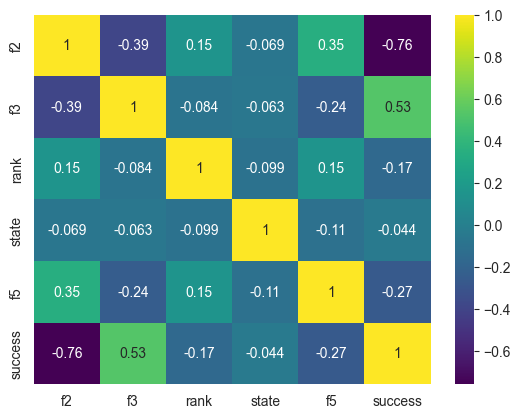

In [15]:
# Show updated heatmap with correlated features removed
corrMatrix = corrDf.corr()
sns.heatmap(corrMatrix, annot=True, cmap='viridis')
plt.show()

Verify revised X set has F1 and F4 features removed

In [18]:
X_corr = corrDf.drop(['success'], axis=1)
Y_corr = corrDf['success']
print(X_corr.head())
print(Y_corr.head())

         f2    f3  rank  state    f5
0  0.308841  0.18     0      2 -0.23
1  0.695683 -0.47     2      1  0.95
2  0.000000  1.55     2      1  0.11
3  0.598111 -0.21     2      0  0.10
5 -0.458668  0.92     2      2 -0.61
0    1
1    0
2    0
3    0
5    1
Name: success, dtype: int64


Refit model on de-correlated dataset

In [19]:
# 67% train, 33% test on de-correlated feature dataset
X_train, X_test, y_train, y_test = train_test_split(X_corr,
                                                    Y_corr,
                                                    test_size=0.33,
                                                    random_state=seed)

Standardize Decorrelated Dataset as with part B1 for use in the B2 model

In [20]:
 # Standardize Data with correlated features removed for part B2
scaler = StandardScaler()
X_train_std_corr = scaler.fit_transform(X_train)
X_test_std_corr = scaler.transform(X_test)

Create model B2:
* Uses same basic setup as model A and B1:
    * single 16 neuron hidden layer with RELU activation
    * single output layer with sigmoid activation
    * uses the same loss function: Binary cross entropy
    * uses the same optimizer: adam
    * uses the same metrics: accuracy
* However, uses a 5 node input layer due to only having 5 features as F1
  and F4 have been removed (making up the original 7 features).

In [22]:
model_corr = keras.Sequential()
model_corr.add(layers.Dense(16, input_shape=(5,),
                            activation='relu'))  # for Part B
model_corr.add(layers.Dense(1, activation='sigmoid'))

# compile model
model_corr.compile(loss="binary_crossentropy", optimizer='adam',
                   metrics=['accuracy'])
print('Part B2 model constructed')

Part B2 model constructed


Run Model B2:
* Standardized Data
* De-Correlation: Dropping F1, F4
* Input Layer: 5 neurons
* Hidden Layers: 1
    * Layer 1: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 67/33
* Batch Size: 32

In [23]:
print('--------START PART B2: DECORRELATED & STANDARDIZED TEST----')
tic = time.time()
# fit model
model_corr.fit(X_train_std_corr, y_train,
               validation_data=(X_test_std_corr, y_test),
               epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

--------START PART B2: DECORRELATED & STANDARDIZED TEST----
Epoch 1/100
3/3 [==============================] - 1s 65ms/step - loss: 0.5607 - accuracy: 0.8000 - val_loss: 0.5747 - val_accuracy: 0.7879
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.5537 - accuracy: 0.8154 - val_loss: 0.5713 - val_accuracy: 0.7879
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.5493 - accuracy: 0.8308 - val_loss: 0.5684 - val_accuracy: 0.7879
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.5449 - accuracy: 0.8462 - val_loss: 0.5652 - val_accuracy: 0.7879
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.5397 - accuracy: 0.8462 - val_loss: 0.5620 - val_accuracy: 0.7879
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.5350 - accuracy: 0.8462 - val_loss: 0.5589 - val_accuracy: 0.7879
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.5308 - accuracy: 0.8462 - 

Build Model C1
Standardized Data 
Decorrelation: None
* Input Layer: 7 neurons
* Hidden Layers: 1
    * Layer 1: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 67/33
* Batch Size: 32

In [24]:
modelC1 = keras.Sequential()
modelC1.add(layers.Dense(16, input_shape=(7,),
                        activation='relu'))
modelC1.add(layers.Dense(16, activation='relu'))
modelC1.add(layers.Dense(1, activation='sigmoid'))

modelC1.compile(loss="binary_crossentropy", optimizer='adam',
                metrics=['accuracy'])
print('Part C1 model constructed')

Part C1 model constructed


Train and test model C1

In [25]:
print('----START PART C1: STANDARDIZED TEST w/ 2 hidden layers----')
# fit new model with 7 inputs
tic = time.time()
modelC1.fit(X_train_std, y_train,
            validation_data=(X_test_std, y_test),
            epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

----START PART C1: STANDARDIZED TEST w/ 2 hidden layers----
Epoch 1/100
3/3 [==============================] - 1s 82ms/step - loss: 0.7145 - accuracy: 0.4769 - val_loss: 0.6797 - val_accuracy: 0.5152
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6982 - accuracy: 0.5077 - val_loss: 0.6692 - val_accuracy: 0.5758
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6875 - accuracy: 0.5692 - val_loss: 0.6603 - val_accuracy: 0.6061
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6782 - accuracy: 0.6000 - val_loss: 0.6528 - val_accuracy: 0.6061
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6700 - accuracy: 0.6308 - val_loss: 0.6452 - val_accuracy: 0.6061
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6618 - accuracy: 0.6615 - val_loss: 0.6371 - val_accuracy: 0.6061
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6530 - accuracy: 0.6615 - 

Build Model C2
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 67/33
* Batch Size: 32

In [26]:
modelC2 = keras.Sequential()
modelC2.add(layers.Dense(16, input_shape=(5,),
                         activation='relu'))
modelC2.add(layers.Dense(16, activation='relu'))
modelC2.add(layers.Dense(1, activation='sigmoid'))

modelC2.compile(loss="binary_crossentropy", optimizer='adam',
                metrics=['accuracy'])
print('Part C2 model constructed')

Part C2 model constructed


Test and time C2 (second hidden layer)

In [27]:
print('---START PART C2: DECORRELATED & STD w/ 2 hidden layers----')

# fit new model with 5 feature inputs (decorrelated)
tic = time.time()
modelC2.fit(X_train_std_corr, y_train,
            validation_data=(X_test_std_corr, y_test),
            epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

---START PART C2: DECORRELATED & STD w/ 2 hidden layers----
Epoch 1/100
3/3 [==============================] - 1s 72ms/step - loss: 0.6548 - accuracy: 0.6769 - val_loss: 0.6232 - val_accuracy: 0.6364
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6408 - accuracy: 0.6923 - val_loss: 0.6146 - val_accuracy: 0.6364
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6292 - accuracy: 0.7231 - val_loss: 0.6068 - val_accuracy: 0.6667
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6186 - accuracy: 0.7385 - val_loss: 0.5997 - val_accuracy: 0.6667
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6089 - accuracy: 0.7538 - val_loss: 0.5923 - val_accuracy: 0.6970
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.5999 - accuracy: 0.7692 - val_loss: 0.5853 - val_accuracy: 0.7273
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.5914 - accuracy: 0.7846 - 

Experiment C3 (DROP F4):
* Explore whether dropping a single feature (F1 OR F4) has an impact on 
  the model.
* Still using 2 hidden layers

Create new data frame dropping ONLY feature 4 (F4)

In [28]:
noF4df = df
noF4df = noF4df.drop(['f4'], axis=1)
print(noF4df.head())

         f1        f2    f3  rank  state    f5  success
0  0.018441  0.308841  0.18     0      2 -0.23        1
1 -0.718349  0.695683 -0.47     2      1  0.95        0
2  1.000000  0.000000  1.55     2      1  0.11        0
3 -0.801414  0.598111 -0.21     2      0  0.10        0
5  0.715472 -0.458668  0.92     2      2 -0.61        1


Train Test Split dataframe
Standardize dataset

In [31]:
# Prep inputs for Train Test Split
X_corr_noF4 = noF4df.drop(['success'], axis=1)
Y_corr_noF4 = noF4df['success']
print(X_corr_noF4.head())
print(Y_corr_noF4.head())

# 67% train, 33% test on de-correlated feature dataset
X_train, X_test, y_train, y_test = train_test_split(X_corr_noF4,
                                                    Y_corr_noF4,
                                                    test_size=0.33,
                                                    random_state=seed)
# Standardize Data with correlated features removed for part C3
scaler = StandardScaler()
X_train_nof4 = scaler.fit_transform(X_train)
X_test_nof4 = scaler.transform(X_test)

         f1        f2    f3  rank  state    f5
0  0.018441  0.308841  0.18     0      2 -0.23
1 -0.718349  0.695683 -0.47     2      1  0.95
2  1.000000  0.000000  1.55     2      1  0.11
3 -0.801414  0.598111 -0.21     2      0  0.10
5  0.715472 -0.458668  0.92     2      2 -0.61
0    1
1    0
2    0
3    0
5    1
Name: success, dtype: int64


Create new model C3:
Standardized Data
De-Correlation: Dropping F4
* Input Layer: 6 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 67/33
* Batch Size: 32

In [33]:
modelC3 = keras.Sequential()
modelC3.add(layers.Dense(16, input_shape=(6,),
                         activation='relu'))
modelC3.add(layers.Dense(16, activation='relu'))
modelC3.add(layers.Dense(1, activation='sigmoid'))

modelC3.compile(loss="binary_crossentropy", optimizer='adam',
                metrics=['accuracy'])
print('Part C3 model constructed')

Part C3 model constructed


In [34]:
print('---START PART C3: No F4, Std,  w/ 2 hidden layers----')
tic = time.time()
modelC3.fit(X_train_nof4, y_train,
            validation_data=(X_test_nof4, y_test),
            epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

---START PART C3: No F4, Std,  w/ 2 hidden layers----
Epoch 1/100
3/3 [==============================] - 1s 61ms/step - loss: 0.7837 - accuracy: 0.3692 - val_loss: 0.7691 - val_accuracy: 0.3939
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7672 - accuracy: 0.4000 - val_loss: 0.7542 - val_accuracy: 0.4545
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7537 - accuracy: 0.4000 - val_loss: 0.7407 - val_accuracy: 0.4848
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7425 - accuracy: 0.4462 - val_loss: 0.7288 - val_accuracy: 0.5455
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.7321 - accuracy: 0.4769 - val_loss: 0.7187 - val_accuracy: 0.5455
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7227 - accuracy: 0.4923 - val_loss: 0.7091 - val_accuracy: 0.5455
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7141 - accuracy: 0.5077 - val_lo

Experiment C4 (DROP F1):
* Explore whether dropping a single feature (F1 OR F4) has an impact on 
  the model.
* Still using 2 hidden layers

Create new data frame dropping ONLY feature 1 (F1)

In [35]:
noF1df = df
noF1df = noF1df.drop(['f1'], axis=1)
print(noF1df.head())

         f2    f3    f4  rank  state    f5  success
0  0.308841  0.18 -0.12     0      2 -0.23        1
1  0.695683 -0.47  1.01     2      1  0.95        0
2  0.000000  1.55  0.10     2      1  0.11        0
3  0.598111 -0.21  0.24     2      0  0.10        0
5 -0.458668  0.92 -0.65     2      2 -0.61        1


Train Test Split dataframe
Standardize dataset

In [36]:
# Prep inputs for Train Test Split
X_corr_noF1 = noF1df.drop(['success'], axis=1)
Y_corr_noF1 = noF1df['success']
print(X_corr_noF1.head())
print(Y_corr_noF1.head())

# 67% train, 33% test on de-correlated feature dataset
X_train, X_test, y_train, y_test = train_test_split(X_corr_noF1,
                                                    Y_corr_noF1,
                                                    test_size=0.33,
                                                    random_state=seed)
# Standardize Data with correlated features removed for part C4
scaler = StandardScaler()
X_train_nof1 = scaler.fit_transform(X_train)
X_test_nof1 = scaler.transform(X_test)

         f2    f3    f4  rank  state    f5
0  0.308841  0.18 -0.12     0      2 -0.23
1  0.695683 -0.47  1.01     2      1  0.95
2  0.000000  1.55  0.10     2      1  0.11
3  0.598111 -0.21  0.24     2      0  0.10
5 -0.458668  0.92 -0.65     2      2 -0.61
0    1
1    0
2    0
3    0
5    1
Name: success, dtype: int64


Create new model C4:
Standardized Data
De-Correlation: Dropping F1
* Input Layer: 6 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 67/33
* Batch Size: 32

In [37]:
modelC4 = keras.Sequential()
modelC4.add(layers.Dense(16, input_shape=(6,),
                         activation='relu'))
modelC4.add(layers.Dense(16, activation='relu'))
modelC4.add(layers.Dense(1, activation='sigmoid'))

modelC4.compile(loss="binary_crossentropy", optimizer='adam',
                metrics=['accuracy'])
print('Part C4 model constructed')

Part C4 model constructed


In [38]:
print('---START PART C4: No F1, Std,  w/ 2 hidden layers----')
tic = time.time()
modelC4.fit(X_train_nof1, y_train,
            validation_data=(X_test_nof1, y_test),
            epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

---START PART C4: No F1, Std,  w/ 2 hidden layers----
Epoch 1/100
3/3 [==============================] - 1s 65ms/step - loss: 0.6643 - accuracy: 0.6154 - val_loss: 0.6324 - val_accuracy: 0.6364
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6552 - accuracy: 0.6308 - val_loss: 0.6284 - val_accuracy: 0.6061
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6489 - accuracy: 0.6769 - val_loss: 0.6240 - val_accuracy: 0.6364
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6427 - accuracy: 0.7231 - val_loss: 0.6194 - val_accuracy: 0.6667
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6365 - accuracy: 0.7385 - val_loss: 0.6148 - val_accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6306 - accuracy: 0.7538 - val_loss: 0.6107 - val_accuracy: 0.6667
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6248 - accuracy: 0.7692 - val_lo

Experiment C5 (DOUBLE EPOCHS):
* Explore how doubling the number of epochs from 100 to 200 steps 
  impacts model performance 
* Still using 2 hidden layers

All other parameters aside from epoch count are the same as C1

Create new model C5:
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 200
* Train-Test Split: 67/33
* Batch Size: 32

In [48]:
# C5: No dropping of correlated data. Double Epochs
modelC5 = keras.Sequential()
modelC5.add(layers.Dense(16, input_shape=(7,),
                        activation='relu'))
modelC5.add(layers.Dense(16, activation='relu'))
modelC5.add(layers.Dense(1, activation='sigmoid'))

modelC5.compile(loss="binary_crossentropy", optimizer='adam',
                metrics=['accuracy'])
print('Part C5 model constructed')

Part C5 model constructed


In [49]:
print('----START PART C5: 2 hidden layers. 200 epochs----')
# fit new model with 7 inputs
tic = time.time()
modelC5.fit(X_train_std, y_train,
            validation_data=(X_test_std, y_test),
            epochs=200, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

----START PART C5: 2 hidden layers. 200 epochs----
Epoch 1/200
3/3 [==============================] - 1s 89ms/step - loss: 0.5743 - accuracy: 0.6154 - val_loss: 0.6242 - val_accuracy: 0.6061
Epoch 2/200
3/3 [==============================] - 0s 17ms/step - loss: 0.5614 - accuracy: 0.6615 - val_loss: 0.6153 - val_accuracy: 0.5758
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 0.5508 - accuracy: 0.6923 - val_loss: 0.6062 - val_accuracy: 0.5758
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 0.5402 - accuracy: 0.7077 - val_loss: 0.5968 - val_accuracy: 0.5758
Epoch 5/200
3/3 [==============================] - 0s 15ms/step - loss: 0.5289 - accuracy: 0.7538 - val_loss: 0.5876 - val_accuracy: 0.5758
Epoch 6/200
3/3 [==============================] - 0s 15ms/step - loss: 0.5190 - accuracy: 0.7538 - val_loss: 0.5793 - val_accuracy: 0.5758
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 0.5095 - accuracy: 0.7846 - val_loss:

Experiment C6 (HALF EPOCHS):
* Explore how halving the number of epochs from 100 to 50 steps 
  impacts model performance 
* Still using 2 hidden layers

All other parameters are the same as C1

Create new model C6
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 50
* Train-Test Split: 67/33
* Batch Size: 32

In [50]:
modelC6 = keras.Sequential()
modelC6.add(layers.Dense(16, input_shape=(7,),
                        activation='relu'))
modelC6.add(layers.Dense(16, activation='relu'))
modelC6.add(layers.Dense(1, activation='sigmoid'))

modelC6.compile(loss="binary_crossentropy", optimizer='adam',
                metrics=['accuracy'])
print('Part C6 model constructed')

Part C6 model constructed


In [51]:
print('----START PART C6: 2 hidden layers. 50 epochs----')
# fit new model with 7 inputs
tic = time.time()
modelC6.fit(X_train_std, y_train,
            validation_data=(X_test_std, y_test),
            epochs=50, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

----START PART C6: 2 hidden layers. 50 epochs----
Epoch 1/50
3/3 [==============================] - 1s 65ms/step - loss: 0.6746 - accuracy: 0.5077 - val_loss: 0.6493 - val_accuracy: 0.5758
Epoch 2/50
3/3 [==============================] - 0s 14ms/step - loss: 0.6653 - accuracy: 0.5077 - val_loss: 0.6429 - val_accuracy: 0.6061
Epoch 3/50
3/3 [==============================] - 0s 14ms/step - loss: 0.6577 - accuracy: 0.5538 - val_loss: 0.6370 - val_accuracy: 0.6061
Epoch 4/50
3/3 [==============================] - 0s 14ms/step - loss: 0.6502 - accuracy: 0.5385 - val_loss: 0.6313 - val_accuracy: 0.6061
Epoch 5/50
3/3 [==============================] - 0s 14ms/step - loss: 0.6431 - accuracy: 0.5692 - val_loss: 0.6260 - val_accuracy: 0.6061
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6360 - accuracy: 0.6000 - val_loss: 0.6213 - val_accuracy: 0.6364
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6292 - accuracy: 0.6462 - val_loss: 0.6164 

Experiment C7 (DOUBLE BATCH SIZE):
* Explore how doubling the batch size from 32 to 64 
  impacts model performance 
* Still using 2 hidden layers

All other parameters are the same as C1

Create new model C7
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 67/33
* Batch Size: 64

In [52]:
# C7: Double batch size to 64. No correlation drops. 100 Epochs
modelC7 = keras.Sequential()
modelC7.add(layers.Dense(16, input_shape=(7,),
                         activation='relu'))
modelC7.add(layers.Dense(16, activation='relu'))
modelC7.add(layers.Dense(1, activation='sigmoid'))

modelC7.compile(loss="binary_crossentropy", optimizer='adam',
                metrics=['accuracy'])
print('Part C7 model constructed')

Part C7 model constructed


In [53]:
print('----START PART C7: 64 batch size. 100 epochs----')
# fit new model with 7 inputs
tic = time.time()
modelC7.fit(X_train_std, y_train,
            validation_data=(X_test_std, y_test),
            epochs=100, batch_size=64)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

----START PART C7: 64 batch size. 100 epochs----
Epoch 1/100
2/2 [==============================] - 1s 126ms/step - loss: 0.7578 - accuracy: 0.5077 - val_loss: 0.6974 - val_accuracy: 0.5455
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 0.7480 - accuracy: 0.5077 - val_loss: 0.6914 - val_accuracy: 0.5455
Epoch 3/100
2/2 [==============================] - 0s 28ms/step - loss: 0.7399 - accuracy: 0.5077 - val_loss: 0.6849 - val_accuracy: 0.5455
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 0.7315 - accuracy: 0.5077 - val_loss: 0.6784 - val_accuracy: 0.5455
Epoch 5/100
2/2 [==============================] - 0s 27ms/step - loss: 0.7235 - accuracy: 0.5077 - val_loss: 0.6729 - val_accuracy: 0.5455
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 0.7166 - accuracy: 0.5077 - val_loss: 0.6677 - val_accuracy: 0.5455
Epoch 7/100
2/2 [==============================] - 0s 26ms/step - loss: 0.7102 - accuracy: 0.5231 - val_loss: 

Experiment C8 (TRAIN TEST SPLIT 50:50):
* Explore how adjusting the train test split to 50:50 from 67:33 
  impacts model performance 
* Still using 2 hidden layers

All other parameters are the same as C1

Create new model C8
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 50/50
* Batch Size: 32

In [54]:
# C8: batch size to 32. No correlation drops. 100 Epochs.
# 50: 50 Test: Train
modelC8 = keras.Sequential()
modelC8.add(layers.Dense(16, input_shape=(7,),
                         activation='relu'))
modelC8.add(layers.Dense(16, activation='relu'))
modelC8.add(layers.Dense(1, activation='sigmoid'))

modelC8.compile(loss="binary_crossentropy", optimizer='adam',
                metrics=['accuracy'])
print('Part C8 model constructed')

# 50% train, 50% test
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.5,
                                                    random_state=seed)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Part C8 model constructed


In [55]:
print('----START PART C8: 50:50 test-train----')
tic = time.time()
modelC8.fit(X_train_std, y_train,
            validation_data=(X_test_std, y_test),
            epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

----START PART C8: 50:50 test-train----
Epoch 1/100
2/2 [==============================] - 1s 127ms/step - loss: 0.6519 - accuracy: 0.6327 - val_loss: 0.6439 - val_accuracy: 0.6327
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 0.6425 - accuracy: 0.6327 - val_loss: 0.6379 - val_accuracy: 0.6327
Epoch 3/100
2/2 [==============================] - 0s 28ms/step - loss: 0.6336 - accuracy: 0.6531 - val_loss: 0.6323 - val_accuracy: 0.6531
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 0.6252 - accuracy: 0.6735 - val_loss: 0.6264 - val_accuracy: 0.6735
Epoch 5/100
2/2 [==============================] - 0s 26ms/step - loss: 0.6173 - accuracy: 0.7143 - val_loss: 0.6204 - val_accuracy: 0.6735
Epoch 6/100
2/2 [==============================] - 0s 28ms/step - loss: 0.6089 - accuracy: 0.7143 - val_loss: 0.6148 - val_accuracy: 0.6939
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 0.6006 - accuracy: 0.7143 - val_loss: 0.6093 - 

Experiment C9 (TRAIN TEST SPLIT 20:80):
* Explore how adjusting the train test split to 20:80 from 67:33 
  impacts model performance 
* Still using 2 hidden layers

All other parameters are the same as C1

Create new model C9
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 20/80
* Batch Size: 32

In [56]:
# C9: batch size to 32. No correlation drops. 100 Epochs.
# 20:80 Test: Train
modelC9 = keras.Sequential()
modelC9.add(layers.Dense(16, input_shape=(7,),
                         activation='relu'))
modelC9.add(layers.Dense(16, activation='relu'))
modelC9.add(layers.Dense(1, activation='sigmoid'))

modelC9.compile(loss="binary_crossentropy", optimizer='adam',
                metrics=['accuracy'])
print('Part C9 model constructed')

# 20% train, 80% test
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.8,
                                                    random_state=seed)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Part C9 model constructed


In [57]:
print('----START PART C9: 20:80 test-train----')
tic = time.time()
modelC9.fit(X_train_std, y_train,
            validation_data=(X_test_std, y_test),
            epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

----START PART C9: 20:80 test-train----
Epoch 1/100
1/1 [==============================] - 1s 683ms/step - loss: 0.7392 - accuracy: 0.3684 - val_loss: 0.6763 - val_accuracy: 0.5949
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 0.7322 - accuracy: 0.3684 - val_loss: 0.6724 - val_accuracy: 0.5823
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 0.7252 - accuracy: 0.4211 - val_loss: 0.6686 - val_accuracy: 0.5823
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 0.7185 - accuracy: 0.4211 - val_loss: 0.6647 - val_accuracy: 0.5823
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 0.7118 - accuracy: 0.4211 - val_loss: 0.6608 - val_accuracy: 0.6076
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 0.7051 - accuracy: 0.4211 - val_loss: 0.6570 - val_accuracy: 0.6076
Epoch 7/100
1/1 [==============================] - 0s 29ms/step - loss: 0.6986 - accuracy: 0.5263 - val_loss: 0.6533 - 

Experiment C10 (TRAIN TEST SPLIT 80:20):
* Explore how adjusting the train test split to 80:20 from 67:33 
  impacts model performance 
* Still using 2 hidden layers

All other parameters are the same as C1

Create new model C10
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 80/20
* Batch Size: 32

In [58]:
# C10: batch size to 32. No correlation drops. 100 Epochs.
# 80:20 Test: Train
modelC10 = keras.Sequential()
modelC10.add(layers.Dense(16, input_shape=(7,),
                         activation='relu'))
modelC10.add(layers.Dense(16, activation='relu'))
modelC10.add(layers.Dense(1, activation='sigmoid'))

modelC10.compile(loss="binary_crossentropy", optimizer='adam',
                 metrics=['accuracy'])
print('Part C10 model constructed')

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=seed)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Part C10 model constructed


In [59]:
print('----START PART C10: 80:20 test-train----')
tic = time.time()
modelC10.fit(X_train_std, y_train,
             validation_data=(X_test_std, y_test),
             epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

----START PART C10: 80:20 test-train----
Epoch 1/100
3/3 [==============================] - 1s 63ms/step - loss: 0.7136 - accuracy: 0.5256 - val_loss: 0.8072 - val_accuracy: 0.4500
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6938 - accuracy: 0.5256 - val_loss: 0.7917 - val_accuracy: 0.4500
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6740 - accuracy: 0.5256 - val_loss: 0.7769 - val_accuracy: 0.4500
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6572 - accuracy: 0.5256 - val_loss: 0.7632 - val_accuracy: 0.4500
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6402 - accuracy: 0.5256 - val_loss: 0.7503 - val_accuracy: 0.4500
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6242 - accuracy: 0.5256 - val_loss: 0.7388 - val_accuracy: 0.4500
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6095 - accuracy: 0.5256 - val_loss: 0.7282 - 

Experiment C11 (Double Second Layer Neurons):
* Explore how adjusting second layer neuron count from 16 to 32 
  impacts model performance 
* Still using 2 hidden layers

All other parameters are the same as C1

Create new model C11
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 32 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 67/33
* Batch Size: 32

In [60]:
# C11: batch size to 32. No correlation drops. 100 Epochs.
# 32 second layer neurons
modelC11 = keras.Sequential()
modelC11.add(layers.Dense(16, input_shape=(7,),
                          activation='relu'))
modelC11.add(layers.Dense(32, activation='relu'))
modelC11.add(layers.Dense(1, activation='sigmoid'))

modelC11.compile(loss="binary_crossentropy", optimizer='adam',
                 metrics=['accuracy'])
print('Part C11 model constructed')

# 67% train, 33% test
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.33,
                                                    random_state=seed)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Part C11 model constructed


In [61]:
print('----START PART C11: 32 second layer neurons test----')
tic = time.time()
modelC11.fit(X_train_std, y_train,
             validation_data=(X_test_std, y_test),
             epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

----START PART C11: 32 second layer neurons test----
Epoch 1/100
3/3 [==============================] - 1s 67ms/step - loss: 0.6914 - accuracy: 0.5077 - val_loss: 0.6378 - val_accuracy: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6724 - accuracy: 0.5538 - val_loss: 0.6245 - val_accuracy: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6575 - accuracy: 0.5692 - val_loss: 0.6137 - val_accuracy: 0.7576
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6436 - accuracy: 0.6462 - val_loss: 0.6045 - val_accuracy: 0.7576
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6320 - accuracy: 0.7385 - val_loss: 0.5959 - val_accuracy: 0.7576
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6205 - accuracy: 0.7692 - val_loss: 0.5873 - val_accuracy: 0.7576
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6092 - accuracy: 0.7692 - val_los

Experiment C12 (Adding a 3rd Hidden Layer):
* Explore how adding a third 16 layer hidden layer 
  impacts model performance 
* Still using 2 hidden layers

All other parameters are the same as C1

Create new model C12
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 3
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
    * Layer 3: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 67/33
* Batch Size: 32

In [62]:
# C12: batch size to 32. No correlation drops. 100 Epochs.
# C1 but a Third layer of 16 neurons.
modelC12 = keras.Sequential()
modelC12.add(layers.Dense(16, input_shape=(7,),
                          activation='relu'))
modelC12.add(layers.Dense(16, activation='relu'))
modelC12.add(layers.Dense(16, activation='relu'))
modelC12.add(layers.Dense(1, activation='sigmoid'))

modelC12.compile(loss="binary_crossentropy", optimizer='adam',
                 metrics=['accuracy'])
print('Part C12 model constructed')

Part C12 model constructed


In [63]:
print('----START PART C12: 3rd layer of 16 neurons test----')
tic = time.time()
modelC12.fit(X_train_std, y_train,
             validation_data=(X_test_std, y_test),
             epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

----START PART C12: 3rd layer of 16 neurons test----
Epoch 1/100
3/3 [==============================] - 1s 71ms/step - loss: 0.7142 - accuracy: 0.4462 - val_loss: 0.6835 - val_accuracy: 0.4848
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7035 - accuracy: 0.4769 - val_loss: 0.6793 - val_accuracy: 0.5152
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6952 - accuracy: 0.5385 - val_loss: 0.6756 - val_accuracy: 0.4848
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6885 - accuracy: 0.5692 - val_loss: 0.6721 - val_accuracy: 0.5455
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6831 - accuracy: 0.6462 - val_loss: 0.6690 - val_accuracy: 0.5758
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6772 - accuracy: 0.6769 - val_loss: 0.6659 - val_accuracy: 0.5455
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6722 - accuracy: 0.6615 - val_los

Experiment C13 (SGD Optimizer):
* Explore how changing from the adam optimizer to the sgd optimizer 
  impacts model performance 
* Still using 2 hidden layers

All other parameters are the same as C1

Create new model C13
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: SGD
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 67/33
* Batch Size: 32

In [65]:
# C13: batch size to 32. No correlation drops. 100 Epochs.
# C1 but use SGD for the optimizer.
modelC13 = keras.Sequential()
modelC13.add(layers.Dense(16, input_shape=(7,),
                          activation='relu'))
modelC13.add(layers.Dense(16, activation='relu'))
modelC13.add(layers.Dense(1, activation='sigmoid'))

modelC13.compile(loss="binary_crossentropy", optimizer='sgd',
                 metrics=['accuracy'])
print('Part C13 model constructed')

Part C13 model constructed


In [66]:
print('----START PART C13: SGD Optimizer test----')
tic = time.time()
modelC13.fit(X_train_std, y_train,
             validation_data=(X_test_std, y_test),
             epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

----START PART C13: SGD Optimizer test----
Epoch 1/100
3/3 [==============================] - 0s 62ms/step - loss: 0.6945 - accuracy: 0.5077 - val_loss: 0.7238 - val_accuracy: 0.4848
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6893 - accuracy: 0.5077 - val_loss: 0.7185 - val_accuracy: 0.5152
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6848 - accuracy: 0.5231 - val_loss: 0.7159 - val_accuracy: 0.5455
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6822 - accuracy: 0.5538 - val_loss: 0.7102 - val_accuracy: 0.5455
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6780 - accuracy: 0.5692 - val_loss: 0.7034 - val_accuracy: 0.5455
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6727 - accuracy: 0.5692 - val_loss: 0.6988 - val_accuracy: 0.5455
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6678 - accuracy: 0.5846 - val_loss: 0.6944 

Experiment C14 (Set first hidden layer neuron count to 8):
* Explore how changing first hidden layer neuron count to 8 from 16 
  impacts model performance 
* Still using 2 hidden layers

All other parameters are the same as C1

Create new model C14
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 2
    * Layer 1: 8 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: adam
* Metrics: Accuracy

Hyperparams:
* Epochs: 100
* Train-Test Split: 67/33
* Batch Size: 32

In [67]:
# C14: batch size to 32. No correlation drops. 100 Epochs.
# C1 but use set first hidden layer to 8 neurons
modelC14 = keras.Sequential()
modelC14.add(layers.Dense(8, input_shape=(7,),
                          activation='relu'))
modelC14.add(layers.Dense(16, activation='relu'))
modelC14.add(layers.Dense(1, activation='sigmoid'))

modelC14.compile(loss="binary_crossentropy", optimizer='adam',
                 metrics=['accuracy'])
print('Part C14 model constructed')

Part C14 model constructed


In [68]:
print('----START PART C14: 8 hidden layer neurons test----')
tic = time.time()
modelC14.fit(X_train_std, y_train,
             validation_data=(X_test_std, y_test),
             epochs=100, batch_size=32)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

----START PART C14: 8 hidden layer neurons test----
Epoch 1/100
3/3 [==============================] - 1s 68ms/step - loss: 0.7201 - accuracy: 0.4923 - val_loss: 0.6300 - val_accuracy: 0.5455
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7092 - accuracy: 0.4923 - val_loss: 0.6233 - val_accuracy: 0.5455
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6997 - accuracy: 0.4923 - val_loss: 0.6174 - val_accuracy: 0.5455
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6924 - accuracy: 0.4923 - val_loss: 0.6118 - val_accuracy: 0.5455
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6850 - accuracy: 0.5077 - val_loss: 0.6062 - val_accuracy: 0.5455
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6781 - accuracy: 0.5077 - val_loss: 0.6007 - val_accuracy: 0.5758
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6712 - accuracy: 0.5077 - val_loss

Experiment C15 (Nadam optimizer, Train Test 30:70, Epoch 80, Batch 16):
* Explore how changing optimizer to Nadam, Train test split to 30:70,
  number of epochs to 80, and batch size to 16  
  impacts model performance 
* Still using 2 hidden layers

All other parameters are the same as C1

Create new model C15
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Nadam
* Metrics: Accuracy

Hyperparams:
* Epochs: 80
* Train-Test Split: 30:70
* Batch Size: 16

In [69]:
# C15: batch size to 16. No correlation drops. 80 Epochs.
# Set Train:test to 30:70.
# Set optimizer to Nadam

modelC15 = keras.Sequential()
modelC15.add(layers.Dense(16, input_shape=(7,),
                          activation='relu'))
modelC15.add(layers.Dense(16, activation='relu'))
modelC15.add(layers.Dense(1, activation='sigmoid'))

modelC15.compile(loss="binary_crossentropy", optimizer='Nadam',
                 metrics=['accuracy'])
print('Part C15 model constructed')

# 30% train, 70% test
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.70,
                                                    random_state=seed)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Part C15 model constructed


In [70]:
print('----START PART C15: custom test----')
tic = time.time()
modelC15.fit(X_train_std, y_train,
             validation_data=(X_test_std, y_test),
             epochs=80, batch_size=16)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')

----START PART C15: custom test----
Epoch 1/80
2/2 [==============================] - 1s 131ms/step - loss: 0.6737 - accuracy: 0.6207 - val_loss: 0.6784 - val_accuracy: 0.5942
Epoch 2/80
2/2 [==============================] - 0s 31ms/step - loss: 0.6665 - accuracy: 0.6207 - val_loss: 0.6732 - val_accuracy: 0.5797
Epoch 3/80
2/2 [==============================] - 0s 31ms/step - loss: 0.6595 - accuracy: 0.6207 - val_loss: 0.6677 - val_accuracy: 0.5652
Epoch 4/80
2/2 [==============================] - 0s 31ms/step - loss: 0.6529 - accuracy: 0.6552 - val_loss: 0.6625 - val_accuracy: 0.5507
Epoch 5/80
2/2 [==============================] - 0s 30ms/step - loss: 0.6444 - accuracy: 0.6552 - val_loss: 0.6568 - val_accuracy: 0.5652
Epoch 6/80
2/2 [==============================] - 0s 30ms/step - loss: 0.6367 - accuracy: 0.6897 - val_loss: 0.6509 - val_accuracy: 0.5797
Epoch 7/80
2/2 [==============================] - 0s 30ms/step - loss: 0.6289 - accuracy: 0.6897 - val_loss: 0.6448 - val_accurac

Experiment C16 (Nadam optimizer, Train Test 30:70, Epoch 80, Batch 16):
* Explore how changing optimizer to Nadam, Train test split to 30:70,
  number of epochs to 80, and batch size to 16  
  impacts model performance 
* Still using 2 hidden layers

All other parameters are the same as C1

Create new model C15
Standardized Data
De-Correlation: None
* Input Layer: 7 neurons
* Hidden Layers: 2
    * Layer 1: 16 neurons; RELU
    * Layer 2: 16 neurons; RELU
* Output Layer: 1 neuron; Sigmoid
* Loss fn: Binary Cross Entropy
* Optimizer: Nadam
* Metrics: Accuracy

Hyperparams:
* Epochs: 80
* Train-Test Split: 30:70
* Batch Size: 16

In [72]:
# C16: ipynb playground
# batch size to 16. No correlation drops. 80 Epochs.
# Set Train:test to 30:70.
# Set optimizer to Nadam

modelC16 = keras.Sequential()
modelC16.add(layers.Dense(16, input_shape=(7,),
                          activation='relu'))
modelC16.add(layers.Dense(16, activation='relu'))
modelC16.add(layers.Dense(1, activation='sigmoid'))

modelC16.compile(loss="binary_crossentropy", optimizer='Nadam',
                 metrics=['accuracy'])
print('Part C16 model constructed')

# 30% train, 70% test
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.70,
                                                    random_state=seed)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
print('----START PART C16: Ipynb custom test----')
tic = time.time()
modelC16.fit(X_train_std, y_train,
             validation_data=(X_test_std, y_test),
             epochs=800, batch_size=16)
toc = time.time()
print(f'{(toc - tic):.04f} seconds elapsed.')